In [145]:
#Libraries
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [146]:
#Scraping Dataset from Yahoo Finance using yfinance
#Getting data for the Apple Stock
aapl = yf.Ticker("AAPL")

# Apple Company Information
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [147]:
# Apple's Historical Stock Prices
# get historical market data
aapl.dataset = aapl.history(period="max")

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0


In [148]:
#Dropped Columns 'Dividends' and 'Stock Splits'
aapl.dataset.drop(['Dividends', 'Stock Splits'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600
...,...,...,...,...,...
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900


Stochastic Oscillator Indicator

In [149]:
# Calculating %K and %D
aapl.dataset['14-high'] = aapl.dataset['High'].rolling(14).max()
aapl.dataset['14-low'] = aapl.dataset['Low'].rolling(14).min()
aapl.dataset['%K'] = (aapl.dataset['Close'] - aapl.dataset['14-low'])*100/(aapl.dataset['14-high'] - aapl.dataset['14-low'])
aapl.dataset['%D'] = aapl.dataset['%K'].rolling(3).mean()

aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D
Date,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423
2022-04-18,163.919998,166.598404,163.690002,165.070007,67310398,0.0,0.0,179.610001,163.690002,8.668373,15.037109


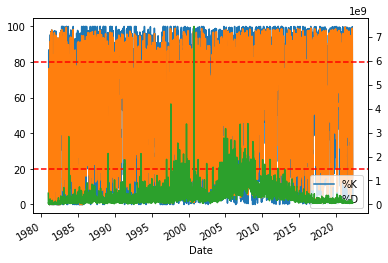

In [150]:
# Plotting Sotchastic Oscillator Indicator Chart
ax = aapl.dataset[['%K', '%D']].plot()
aapl.dataset['Volume'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

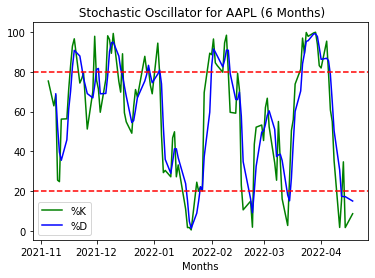

In [151]:
# Plotting Sotchastic Oscillator Indicator Chart- 6 Month Period
aapl.dataset = aapl.history(period="6mo")
# 
# Calculating %K and %D
aapl.dataset['14-high'] = aapl.dataset['High'].rolling(14).max()
aapl.dataset['14-low'] = aapl.dataset['Low'].rolling(14).min()
aapl.dataset['%K'] = (aapl.dataset['Close'] - aapl.dataset['14-low'])*100/(aapl.dataset['14-high'] - aapl.dataset['14-low'])
aapl.dataset['%D'] = aapl.dataset['%K'].rolling(3).mean()



#Plotting the  Bollinger Bands
plt.title(' Stochastic Oscillator for AAPL (6 Months)')
plt.xlabel('Months')
plt.plot(aapl.dataset['%K'], label='%K', c='g')
plt.plot(aapl.dataset['%D'], label='%D',  c='b')
plt.axhline(20, linestyle='--', color="r")
plt.axhline(80, linestyle="--", color="r")
plt.legend()
plt.show()


In [152]:
aapl.dataset.drop(['Dividends', 'Stock Splits'], axis=1)
aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D
Date,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423
2022-04-18,163.919998,166.598404,163.690002,165.070007,67310398,0.0,0,179.610001,163.690002,8.668373,15.037109


In [153]:
# # Adding Buy/Sell Signals from Sotchastic Oscillator Indicator
# def categorise(row):  
#     if row['%K'] <= 20 and row['%D'] <= 20 or row['%D'] >= row['%K']:
#         return 'Buy'
#     elif row['%K'] >= 80 and  row['%D']>= 80 or row['%K'] >= row['%D']:
#         return 'Sell'
#     elif row['%K'] < 80 and  row['%K'] > 20 and row['%D'] < 80 and row['%D'] > 20:
#         return 'Hold'

    
   
# aapl.dataset['SO Indicator'] = aapl.dataset.apply(lambda row: categorise(row), axis=1)

# aapl.dataset.tail(10)

Adjusting the SO Indicator so it is more suitable for beigneer

In [154]:
# Adding Buy/Sell Signals from Sotchastic Oscillator Indicator
def categorise(row):  
    if row['%K'] <= 20 and row['%D'] <= 20:
        return 'Buy'
    elif row['%K'] >= 80 and  row['%D']>= 80:
        return 'Sell'
    else:
        return 'Hold'

    
   
aapl.dataset['SO Indicator'] = aapl.dataset.apply(lambda row: categorise(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator
Date,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0,179.610001,164.910004,35.238053,50.348042,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy


In [155]:
# Distrubition of the Indicator
print(aapl.dataset['SO Indicator'].value_counts())

Hold    93
Sell    22
Buy     10
Name: SO Indicator, dtype: int64


Relative Strenght Index

In [156]:
delta = aapl.dataset['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
aapl.dataset['RSI'] = 100 - (100/(1 + rs))

In [157]:
aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI
Date,,,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold,44.031774
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy,47.045012
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold,51.111316
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy,44.282006
2022-04-18,163.919998,166.598404,163.690002,165.070007,67310398,0.0,0,179.610001,163.690002,8.668373,15.037109,Buy,44.009382


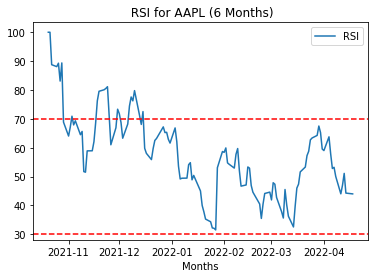

In [158]:
#Plotting the RSI
plt.title(' RSI for AAPL (6 Months)')
plt.xlabel('Months')
plt.plot(aapl.dataset['RSI'], label='RSI')
plt.axhline(30, linestyle='--', color="r")
plt.axhline(70, linestyle="--", color="r")
plt.legend()
plt.show()



In [159]:
# Adding Buy/Sell Signals from RSI Indicator
def categorise_rsi(row):  
    if row['RSI'] <= 30:
        return 'Buy'
    elif row['RSI'] >= 70:
        return 'Sell'
    elif row['RSI'] < 70:
        return 'Hold'
    elif row['RSI'] > 30:
        return 'Hold'    

    
   
aapl.dataset['RSI Indicator'] = aapl.dataset.apply(lambda row: categorise_rsi(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator
Date,,,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell,63.775030,Hold
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold,57.850758,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold,52.802855,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold,53.224706,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0,179.610001,164.910004,35.238053,50.348042,Hold,50.039499,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold,44.031774,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy,47.045012,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold,51.111316,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy,44.282006,Hold


In [160]:
# Distrubition of the Indicator
print(aapl.dataset['RSI Indicator'].value_counts())

Hold    103
Sell     21
Name: RSI Indicator, dtype: int64


Bollinger Bands

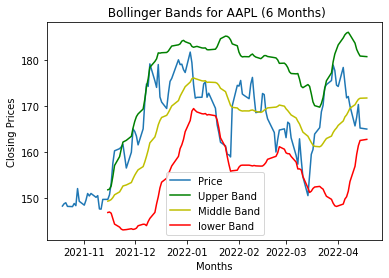

In [161]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    # SMA for 20 Days 
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()

    # Calculate top band
    bollinger_up = sma + std * 2 

    # Calculate bottom band
    bollinger_down = sma - std * 2 
    return bollinger_up, bollinger_down, sma


closing_prices = aapl.dataset['Close']
bollinger_up, bollinger_down, sma = get_bollinger_bands(closing_prices)

#Plotting the  Bollinger Bands
plt.title(' Bollinger Bands for AAPL (6 Months)')
plt.xlabel('Months')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Price')
plt.plot(bollinger_up, label='Upper Band', c='g')
plt.plot(sma, label='Middle Band', c='y')
plt.plot(bollinger_down, label='lower Band', c='r')
plt.legend()
plt.show()

In [162]:
#Adding Bollinger Bands to the Dataset
aapl.dataset['bollinger_up'] = bollinger_up
aapl.dataset['bollinger_down'] = bollinger_down

aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,bollinger_up,bollinger_down
Date,,,,,,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold,44.031774,Hold,183.719099,156.984903
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy,47.045012,Hold,182.360489,159.600514
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold,51.111316,Hold,181.572397,161.469606
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy,44.282006,Hold,180.917334,162.591668
2022-04-18,163.919998,166.598404,163.690002,165.070007,67310398,0.0,0,179.610001,163.690002,8.668373,15.037109,Buy,44.009382,Hold,180.788256,162.829748


In [163]:
# Adding Buy/Sell Signals from Bollinger Bands Indicator
def categorise_bollinger(row):  
    if row['Close'] < row['bollinger_down']:
        return 'Buy'
    elif row['Close'] > row['bollinger_up']:
        return 'Sell'
    else:
        return 'Hold'
    
   
aapl.dataset['Bollinger Indicator'] = aapl.dataset.apply(lambda row: categorise_bollinger(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,bollinger_up,bollinger_down,Bollinger Indicator
Date,,,,,,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0,179.610001,154.460007,95.347919,86.757479,Sell,63.775030,Hold,184.859759,148.783243,Hold
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0,179.610001,157.630005,79.299345,85.505065,Hold,57.850758,Hold,185.531431,149.873570,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0,179.610001,159.759995,60.806064,78.484442,Hold,52.802855,Hold,185.919297,150.373705,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0,179.610001,163.009995,55.000009,65.035139,Hold,53.224706,Hold,186.083449,151.571553,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0,179.610001,164.910004,35.238053,50.348042,Hold,50.039499,Hold,185.525972,153.665030,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold,44.031774,Hold,183.719099,156.984903,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy,47.045012,Hold,182.360489,159.600514,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold,51.111316,Hold,181.572397,161.469606,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy,44.282006,Hold,180.917334,162.591668,Hold


In [164]:
# Distrubition of the Indicator
print(aapl.dataset['Bollinger Indicator'].value_counts())

Hold    112
Sell      8
Buy       5
Name: Bollinger Indicator, dtype: int64


In [165]:
#Cleaned Up Dataset Including Date, Closing Price and the Indicators
cleaned_dataset = aapl.dataset[['Close', 'RSI','RSI Indicator', '%K', '%D','SO Indicator', 'Bollinger Indicator']].copy()
cleaned_dataset.tail()

,Close,RSI,RSI Indicator,%K,%D,SO Indicator,Bollinger Indicator
Date,,,,,,,
2022-04-11,165.750000,44.031774,Hold,1.771793,30.669952,Hold,Hold
2022-04-12,167.660004,47.045012,Hold,15.308317,17.439388,Buy,Hold
2022-04-13,170.399994,51.111316,Hold,34.727099,17.269070,Hold,Hold
2022-04-14,165.289993,44.282006,Hold,1.715854,17.250423,Buy,Hold
2022-04-18,165.070007,44.009382,Hold,8.668373,15.037109,Buy,Hold


In [166]:
# Recommender Based on the three indicators
def recommender(row):  
    if row['RSI Indicator'] == "Buy" and row['SO Indicator'] == 'Buy' and  row['Bollinger Indicator'] == 'Buy':
        return 'Buy'
    elif row['RSI Indicator'] == 'Sell' and row['SO Indicator'] == 'Sell' and  row['Bollinger Indicator'] == 'Sell':
        return 'Sell'
    elif row['RSI Indicator'] == 'Hold' and row['SO Indicator'] == 'Hold' and  row['Bollinger Indicator'] == 'Hold':
        return 'Hold'
    elif row['RSI Indicator'] == 'Buy' and row['SO Indicator'] == 'Buy':
        return 'Buy'
    elif row['RSI Indicator'] == 'Sell' and row['SO Indicator'] == 'Sell':
        return 'Sell'
    else:
        return 'Unclassed'

cleaned_dataset['Recommender'] = cleaned_dataset.apply(lambda row: recommender(row), axis=1)

cleaned_dataset.tail(10)

,Close,RSI,RSI Indicator,%K,%D,SO Indicator,Bollinger Indicator,Recommender
Date,,,,,,,,
2022-04-04,178.440002,63.775030,Hold,95.347919,86.757479,Sell,Hold,Unclassed
2022-04-05,175.059998,57.850758,Hold,79.299345,85.505065,Hold,Hold,Hold
2022-04-06,171.830002,52.802855,Hold,60.806064,78.484442,Hold,Hold,Hold
2022-04-07,172.139999,53.224706,Hold,55.000009,65.035139,Hold,Hold,Hold
2022-04-08,170.089996,50.039499,Hold,35.238053,50.348042,Hold,Hold,Hold
2022-04-11,165.750000,44.031774,Hold,1.771793,30.669952,Hold,Hold,Hold
2022-04-12,167.660004,47.045012,Hold,15.308317,17.439388,Buy,Hold,Unclassed
2022-04-13,170.399994,51.111316,Hold,34.727099,17.269070,Hold,Hold,Hold
2022-04-14,165.289993,44.282006,Hold,1.715854,17.250423,Buy,Hold,Unclassed


In [167]:
# Distrubition of the Recommender
print(cleaned_dataset['Recommender'].value_counts())

Hold         74
Unclassed    46
Sell          5
Name: Recommender, dtype: int64


In [168]:
# # Export the Clean Dataset with the Indicators
# cleaned_dataset.to_csv('clean_dataset.csv')

MACD- Moving Average Convergence Divergence

In [169]:
aapl.dataset.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,bollinger_up,bollinger_down,Bollinger Indicator
Date,,,,,,,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold,44.031774,Hold,183.719099,156.984903,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy,47.045012,Hold,182.360489,159.600514,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold,51.111316,Hold,181.572397,161.469606,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy,44.282006,Hold,180.917334,162.591668,Hold
2022-04-18,163.919998,166.598404,163.690002,165.070007,67310398,0.0,0,179.610001,163.690002,8.668373,15.037109,Buy,44.009382,Hold,180.788256,162.829748,Hold


In [170]:
# Calculating the MACD Line and the Signal Line
ema12 = aapl.dataset['Close'].ewm(span=12, adjust=False).mean()
ema26 = aapl.dataset['Close'].ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()

In [171]:
#Appeding the MACD and Signal Data to Dataset
aapl.dataset['MACD-Line'] = macd
aapl.dataset['MACD-Signal'] = signal
aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,bollinger_up,bollinger_down,Bollinger Indicator,MACD-Line,MACD-Signal
Date,,,,,,,,,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0,179.610001,165.500000,1.771793,30.669952,Hold,44.031774,Hold,183.719099,156.984903,Hold,1.573629,2.261648
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0,179.610001,165.500000,15.308317,17.439388,Buy,47.045012,Hold,182.360489,159.600514,Hold,1.157314,2.040781
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0,179.610001,165.500000,34.727099,17.269070,Hold,51.111316,Hold,181.572397,161.469606,Hold,1.036528,1.839931
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0,179.610001,165.039993,1.715854,17.250423,Buy,44.282006,Hold,180.917334,162.591668,Hold,0.522448,1.576434
2022-04-18,163.919998,166.598404,163.690002,165.070007,67310398,0.0,0,179.610001,163.690002,8.668373,15.037109,Buy,44.009382,Hold,180.788256,162.829748,Hold,0.096175,1.280382


No handles with labels found to put in legend.


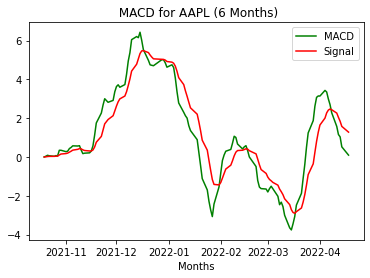

In [173]:

plt.legend()


#Plotting the MACD
plt.title(' MACD for AAPL (6 Months)')
plt.xlabel('Months')
plt.plot(aapl.dataset['MACD-Line'],  label='MACD', color='g')
plt.plot(aapl.dataset['MACD-Signal'], label='Signal', color='r')
plt.legend()
plt.show()

